# Fuel Consumption Analysis

**References:**
+ https://www.kaggle.com/datasets/krupadharamshi/fuelconsumption
+ https://github.com/florence-bockting/python-class-25
+ https://pandas.pydata.org/docs/user_guide/missing_data.html
+ https://seaborn.pydata.org/

**Content:**
  + Data cleaning
     + Finding missing values
     + Handling missing values
     + Finding duplicate rows
     + Removing duplicate rows
     + Data cleaning for the real dataset
  + Data analysis
     + Statistical description
     + Correlation matrix
     + Data analysis for the real dataset
  + Data visualization

### Data Cleaning
+ **Data cleaning** is the process of identifying and correcting errors and missing values in datasets.
+ It ensures the dataset is accurate, reliable, and suitable for analysis.
+ It improves data quality and consistency and ensures datasets are complete and structured properly.

#### Finding missing values
+ Generate a sample dataset with missing values.
+ `import pandas as pd`
+ `import numpy as np`
+ Use `pd.DataFrame` to create a sample dataset.
+ Use `pd.nan` to create the missing values.
+ `from fuel-consumption-analysis import DataCleaning`
+ Use the `missing_value()` function to count missing values in the dataset.
+ We first identify the number of missing values in each column.

In [4]:
import pandas as pd
import numpy as np
from fuel_consumption_analysis.data_cleaning import DataCleaning   # From my package import "DataCleaning" Class

# create a sample dataframe
data = pd.DataFrame(
    {"Name": [
        "Tara",
        "Alice",
        "Ali",
        "Sara",
        "Fara"
    ],
     "Age": [24, 33, np.nan, 19, 26],
     "Salary": [2000, np.nan, 3500, 4000, 2700],
     "Department": ["Finance", np.nan, "IT", np.nan, "IT"]
    }
)

data

#Count the number of missing values 
print(DataCleaning(data).missing_values())

Name          0
Age           1
Salary        1
Department    2
dtype: int64


#### Handling missing values
+ Handling missing values is crucial to avoid biased results and incorrect conclusions.
+ Methods for handling missing values:
     + **Removing missing data:** If a column has too many missing values, it might be best to drop it out.
     + **Replacing missing values:**
          + *For categorical data*: Replace missing values with the most frequency category(mode).
          + *For numerical data*: Replace missing value with the mean or median of corresponding columns.
+ The `fuel-consumption-analysis` package uses the **replacing missing values** technique.
+ Use the `replace_missing_values()` function to handle missing values.

In [6]:
data_whitout_missing_values = DataCleaning(data).replace_missing_values()   # Dataframe whitout missing values

# Check to ensure no missing values remain
print(DataCleaning(data_whitout_missing_values).missing_values())

Name          0
Age           0
Salary        0
Department    0
dtype: int64


#### Finding duplicate rows
+ Duplicate records can distort analysis results by over-representing certain values, leading to incorrect insights.
+ Create and add a new row to the sample dataset, that is duplicate the 5th row.
+ Use the`pd.concat()` to add a new row to the dataset. 
+ Check the duplicate rows in the dataset.
+ Use the `find_duplicates()` function to show the duplicate rows.
+ The result is a `DataFrame`.

In [8]:
# Find duplicate rows in sample dataset
print(DataCleaning(data).find_duplicates())   # No duplicates

new_row = pd.DataFrame({"Name": ["Fara"], "Age": [26], "Salary": [2700], "Department": ["IT"]})   # Create a new row
new_data = pd.concat([data, new_row], ignore_index = True)   # add a new row to sample dataset
print(new_data)

# Find duplicate rows in new dataset contain duplicate
print(DataCleaning(new_data).find_duplicates())

No Duplicate Rows in Dataset.
Empty DataFrame
Columns: [Name, Age, Salary, Department]
Index: []
    Name   Age  Salary Department
0   Tara  24.0  2000.0    Finance
1  Alice  33.0  3050.0         IT
2    Ali  25.5  3500.0         IT
3   Sara  19.0  4000.0         IT
4   Fara  26.0  2700.0         IT
5   Fara  26.0  2700.0         IT
Duplicate Rows:
   Name   Age  Salary Department
4  Fara  26.0  2700.0         IT
5  Fara  26.0  2700.0         IT


#### Removing duplicate rows
+ Removing duplicates ensures that each observation in the dataset is unique and accurate.
+ Use the `remove_duplicates()` function to remove duplicates in the dataset.
+ The result is a `DataFrame`.

In [10]:
data_whitout_duplicates = DataCleaning(new_data).remove_duplicates()

# Check to ensure no duplicate rows remain
print(DataCleaning(data_whitout_duplicates).find_duplicates())

No Duplicate Rows in Dataset.
Empty DataFrame
Columns: [Name, Age, Salary, Department]
Index: []


#### Data cleaning for the real dataset
+ Load the **fuel consumption** dataset.
+ Use the `pd.read_csv` to read dataset.
+ Show dataset information:
     + Use the `df.head(n = ...)` to show n rows of dataset.
     + Use the `df.dtypes` to show the type of each column.

In [12]:
dataset = pd.read_csv("D:/TU-Dortmund/intro-python/FuelConsumption.csv")
dataset.head(n = 7)   # Displaythe dataset
dataset.dtypes    # Display the type of each column

Year                  int64
MAKE                 object
MODEL                object
VEHICLE CLASS        object
ENGINE SIZE         float64
CYLINDERS             int64
TRANSMISSION         object
FUEL                 object
FUEL CONSUMPTION    float64
COEMISSIONS           int64
dtype: object

In [14]:
print(DataCleaning(dataset).missing_values())  # Check missing values

cleaned_data = DataCleaning(dataset).replace_missing_values()  # Handle missing values

print(DataCleaning(cleaned_data).find_duplicates())   # Ckeck duplicate rows

cleaned_data = DataCleaning(cleaned_data).remove_duplicates()  # Remove duplicates

print(cleaned_data.head())  # Display cleaned dataset

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64
No Missing Values in Dataset
Duplicate Rows:
     Year        MAKE                    MODEL VEHICLE CLASS  ENGINE SIZE  \
377  2000  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0   
378  2000  LAND ROVER  DISCOVERY SERIES II 4X4           SUV          4.0   

     CYLINDERS TRANSMISSION FUEL  FUEL CONSUMPTION  COEMISSIONS   
377          8           A4    Z              19.6           403  
378          8           A4    Z              19.6           403  
   Year   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2     

### Data Analysis
+ **Data analysis** is a process of discovering useful information, concluding, and making decisions based on data.
+ It uses statistical and computational techniques.
+ We focus on analyzing the dataset by:
     + Computing statistical summary.
     + Visualizing the correlation between numerical features.

#### Statistical description
+ Compute descriptive statistics such as mean, median, standard deviation, quartiles, etc.
+ From `fuel-consumption-analysis` import `DataAnalysis`.
+ Use the `statistical_description()` function to compute descriptive statistics.

In [16]:
from fuel_consumption_analysis.data_analysis import DataAnalysis

# Use the sample dataframe
print(DataAnalysis(data_whitout_missing_values).statistical_description())

AttributeError: 'DataFrame' object has no attribute 'description'

#### Correlation matrix
+ Visualize correlation relationships between numerical features using a heatmap.
+ The heatmap displays a color spectrum from blue to red.
+ Red shows a strong correlation between the two features.
+ Use the `correlation_matrix()` function to plot the correlation matrix.

In [15]:
DataAnalysis(data_whitout_missing_value).correlation_matrix()

NameError: name 'data_whitout_missing_value' is not defined

#### Data analysis for the real dataset

In [17]:
# Compute descriptive statistics
print(DataAnalysis(cleaned_data).statistical_description())

# Visualize correlation matrix
DataAnalysis(cleaned_data).correlation_matrix()

AttributeError: 'DataFrame' object has no attribute 'description'

#### Data Visualization
+ **Data visualization** is the process of representing data visually through charts, plots, graphs, and other graphical formats to make it easier to understand and analyze.
+ Effective visualization makes complex data more accessible, understandable, and actionable.
+ In this tutorial, we will use **Matplotlib** and **Seaborn**, two powerful Python libraries, to create insightful visualizations.

#### Preparing Data for Visualization
To begin visualizing our data, follow these steps:
+ **Import the `DataVisualization` module** from the `fuel_consumption_analysis.data_visualization` package.
+ Initialize an instance of `DataVisualization` by passing the cleaned dataset.
+ **Use the instance** to generate different types of plots easily.

In [23]:
from fuel_consumption_analysis.data_visualization import DataVisualization
viz= DataVisualization(cleaned_data)

#### Scatter Plot: Mean Fuel Consumption vs. Engine Size
+ The `scatter_plot()` function helps visualize the relationship between **two numerical features**.
+ In this example, it shows **Engine Size** vs. **Mean Fuel Consumption**, while highlighting the **top five most frequent car manufacturers (MAKE)**.

#### **How it works: **
1. Filters the **Top 5 Frequent** Car Brands (`MAKE`).
2. Calculates the Mean Fuel Consumption for each Engine Size.
3. Creates a scatter Plot.
    - `x-axis` → ENGINE SIZE (Numerical)  
    - `y-axis` → FUEL CONSUMPTION (Numerical)  
    - Points are colored based on `MAKE` for better readability.


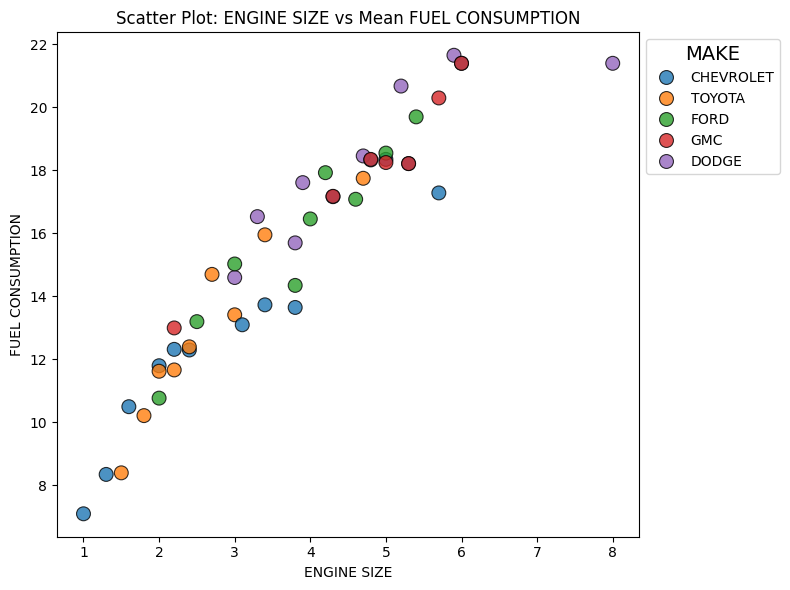

In [21]:

viz.scatter_plot("ENGINE SIZE", "FUEL CONSUMPTION", "MAKE")


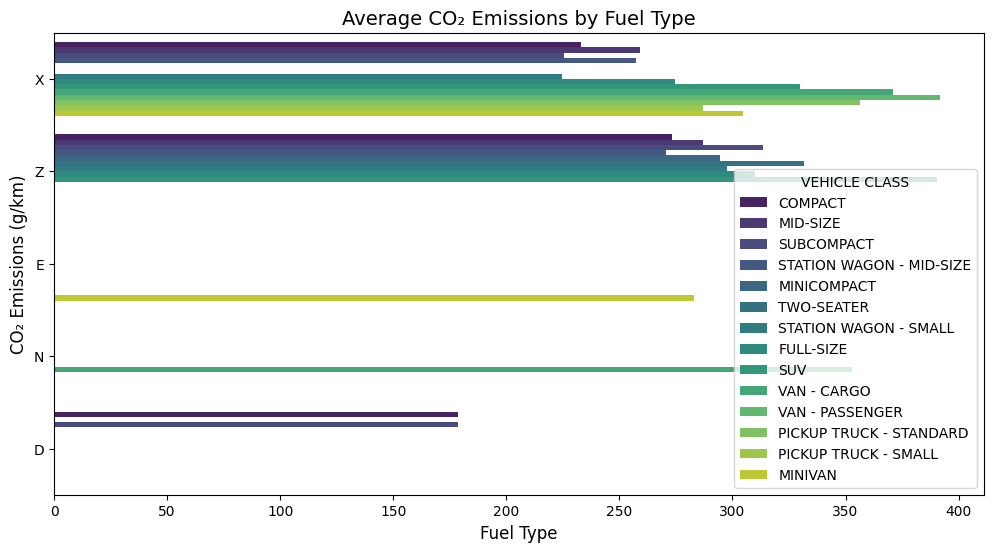

In [17]:
viz.bar_plot("FUEL","COEMISSIONS ","VEHICLE CLASS")

#### Box Plot: Vehicle Class vs. Fuel Consumption
+ The `box_plot()` function helps visualize the distribution of a **numerical** variable across a ***categorical variable**.
+ In this example, it shows **VEHICLE CLASS** vs. **FUEL CONSUMPTION**.

#### **How it works**

Creates the Box Plot for `VEHICLE CLASS` across `FUEL CONSUMPTION`
   - `x-axis` → Vehicle Class (Categorical)  
   - `y-axis` → Fuel Consumption (Numerical)  
   - Box plot shows **median, quartiles, and outliers**.  



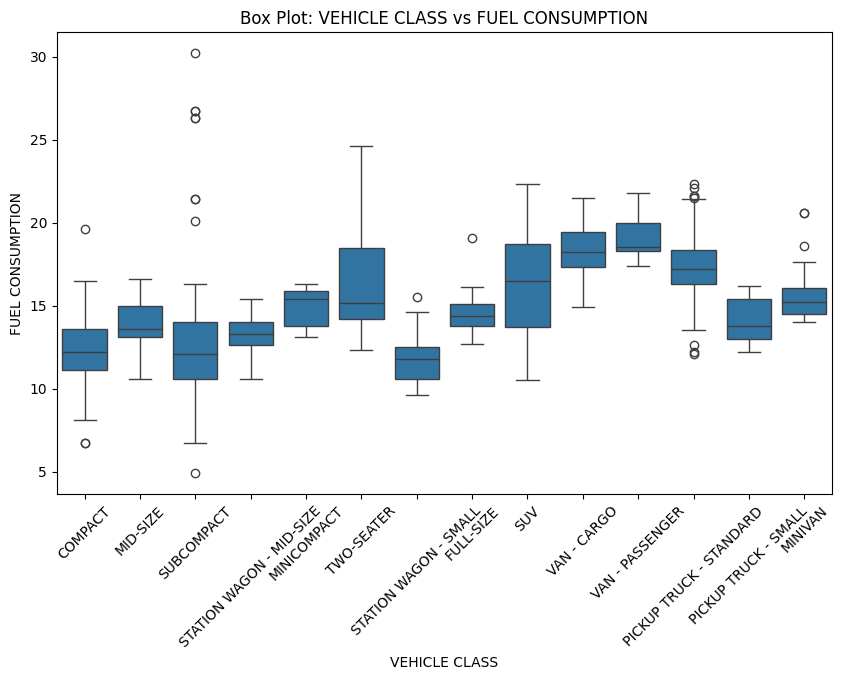

In [21]:
viz.box_plot("VEHICLE CLASS", "FUEL CONSUMPTION")

#### Hist Plot: The Distribution of COEMISSIONS
+ The `histogram_plot()` function visualize the distribution of a numerical variables.
+ In this example, it shows the distribution of **COEMISSIONS**.

#### **How it works**
+ `x-axis` → Fuel Consumption (Numerical)
+ `y-axis` → Frequency (Number of occurrences)
+ A **KDE (Kernel Density Estimate) curve** overlays the histogram to show the data’s distribution.


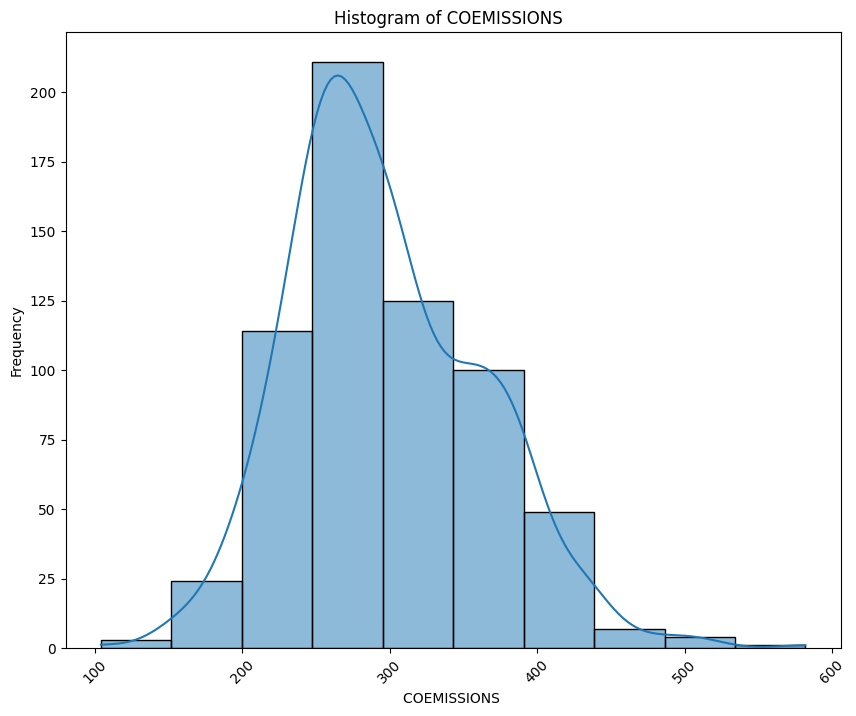

In [23]:
viz.histogram_plot("COEMISSIONS ")

#### Hit Map Plot:
+ The `heat_map_plot()` function visualize the correlation matrix of  the **numerical variables**.


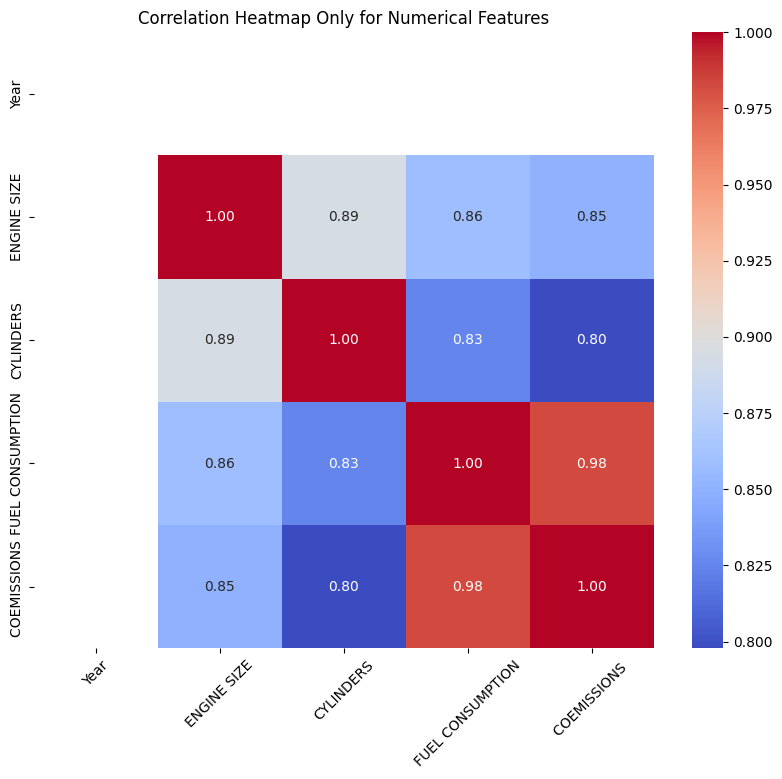

In [25]:
viz.heat_map_plot()

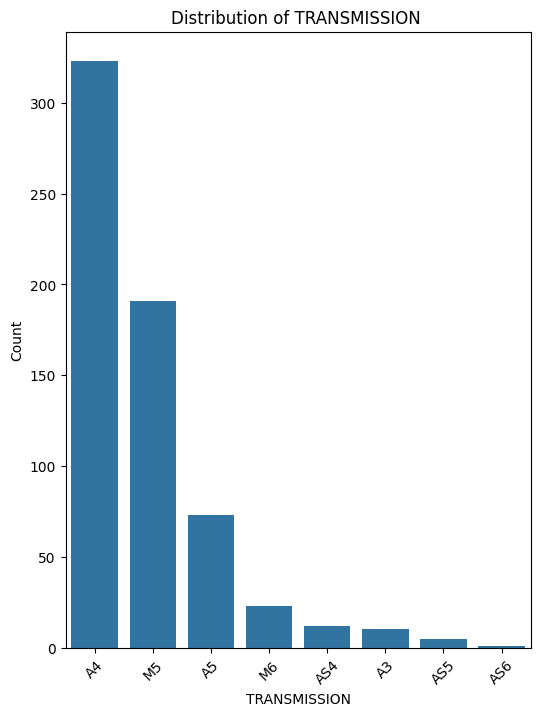

In [27]:
viz.count_plot("TRANSMISSION")